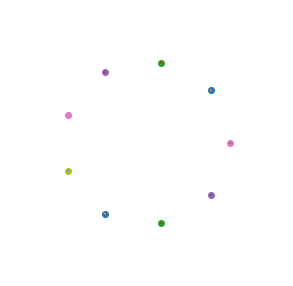

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import decimal
from math import fabs
plt.rcParams["animation.html"] = "jshtml"
animation.rcParams['animation.embed_limit'] = 2**128
fig = plt.figure(figsize=(5,5))
axe = plt.axes(xlim=(-50, 50), ylim=(-50, 50))

V = 0.03
dt = 1
R = 30
circle = 2*np.pi
n = 9
a = circle/n
total_time = 0
min_rad = dt*V+0.05
dots=[]
dots_coor = {}
lines=[]
lines_coor = {}
for i in range(1,n+1):
    dot, = plt.plot([R*np.cos(a*i)],[R*np.sin(a*i)],'o')
    line, = plt.plot([],[],lw=2)
    dots_coor[i-1] = [R*np.cos(a*i), R*np.sin(a*i)]
    lines_coor[i-1] = [[R*np.cos(a*i)], [R*np.sin(a*i)]]
    dots.append(dot)
    lines.append(line)
    
def get_velocity(vec1, vec2):
    x = vec2[0]-vec1[0]
    y = vec2[1]-vec1[1]
    length = (x**2+y**2)**0.5
    x = x/length
    y= y/length
    return [x,y]

   
def animate(i):
    global total_time
    for p in range(int(1/dt)+1):
        running_turtles = 0
        for k in range(len(dots)):
            close_turtles = 0
            for l in range(0,len(dots)):
                if fabs(dots_coor[k][0]-dots_coor[l][0])<= min_rad and fabs(dots_coor[k][1]-dots_coor[l][1])<= min_rad and k != l: 
                    close_turtles +=1
                
            if close_turtles == n-1: continue
            running_turtles +=1
            if k == len(dots) - 1 :
                velocity = get_velocity(dots_coor[k],dots_coor[0])
            else:
                velocity = get_velocity( dots_coor[k],dots_coor[k+1])
            lines_coor[k][0].append(lines_coor[k][0][-1]+V*velocity[0]*dt)
            lines_coor[k][1].append(lines_coor[k][1][-1]+V*velocity[1]*dt)
            lines[k].set_data( lines_coor[k][0],lines_coor[k][1])
            dots_coor[k][0] = dots_coor[k][0] + V*velocity[0]*dt                      #x(t+dt)=x(t)+vx(t)*dt,
            dots_coor[k][1] = dots_coor[k][1] + V*velocity[1]*dt                      #y(t+dt)=y(t)+vy(t)*dt
            dots[k].set_data(dots_coor[k][0], dots_coor[k][1])
        if running_turtles != 0: total_time+=dt
    return dots


ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axe.get_xaxis().set_visible(False)
axe.get_yaxis().set_visible(False)
T = R/(V*np.cos((np.pi - 2*np.pi/n)/2))
ani = animation.FuncAnimation(fig, animate, frames = int(T+100), \
                                     interval=V*dt,blit=True, repeat=True)







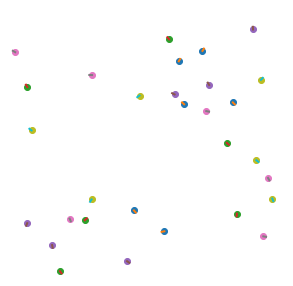

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import decimal
import random
from math import fabs
animation.rcParams['animation.embed_limit'] = 2**128

plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure(figsize=(5,5))
axe = plt.axes(xlim=(-50, 50), ylim=(-50, 50))

V = 1
dt = 1
R = 45
circle = 2*np.pi
n = 30
a = circle/n
total_time = 0
min_rad = dt*V+0.05
dots=[]
dots_coor = {}
dots_angle = []
lines=[]
lines_coor = {}
for i in range(1,n+1):
    d_x =random.uniform(-50,50)
    d_y =random.uniform(-50,50)
    dot, = plt.plot([d_x],[d_y],'o')
    dots_coor[i-1] = [d_x,d_y]
    dots.append(dot)
    line, = plt.plot([],[],lw=2)
    lines_coor[i-1] = [[d_x], [d_y]]
    lines.append(line)
    
def get_velocity(vec1, vec2):
    x = vec2[0]-vec1[0]
    y = vec2[1]-vec1[1]
    length = (x**2+y**2)**0.5
    x = x/length
    y= y/length
    return [x,y]
   
def animate(i):
    global total_time
    
    for k in range(len(dots)):
        close_turtles = 0
        for l in range(0,len(dots)):
            if fabs(dots_coor[k][0]-dots_coor[l][0])< min_rad and fabs(dots_coor[k][1]-dots_coor[l][1])< min_rad and k != l: 
                close_turtles +=1
                
        if close_turtles == n-1: continue
        
        if k == len(dots) - 1 :
            velocity = get_velocity(dots_coor[k],dots_coor[0])
        else:
            velocity = get_velocity( dots_coor[k],dots_coor[k+1])
        lines_coor[k][0].append(lines_coor[k][0][-1]+V*velocity[0]*dt)
        lines_coor[k][1].append(lines_coor[k][1][-1]+V*velocity[1]*dt)
        lines[k].set_data( lines_coor[k][0],lines_coor[k][1])    
        dots_coor[k][0] = dots_coor[k][0] + V*velocity[0]*dt                      #x(t+dt)=x(t)+vx(t)*dt,
        dots_coor[k][1] = dots_coor[k][1] + V*velocity[1]*dt                      #y(t+dt)=y(t)+vy(t)*dt
        dots[k].set_data(dots_coor[k][0], dots_coor[k][1])
    return dots


ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axe.get_xaxis().set_visible(False)
axe.get_yaxis().set_visible(False)
ani = animation.FuncAnimation(fig, animate, frames=500, \
                                      interval=10, blit=True, repeat=True)